In [1]:
import laspy
import numpy as np
import open3d as o3d


# Path to your .laz file
laz_file_path = r"C:\Users\akhil\OneDrive\Documents\Building_recon\4C_block_1_2.laz"

# Read the .laz file using laspy
las = laspy.read(laz_file_path)

# Extract point cloud data
points = np.vstack((las.x, las.y, las.z)).transpose()

# Create an Open3D point cloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

# Visualize the point cloud
o3d.visualization.draw_geometries([pcd])


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


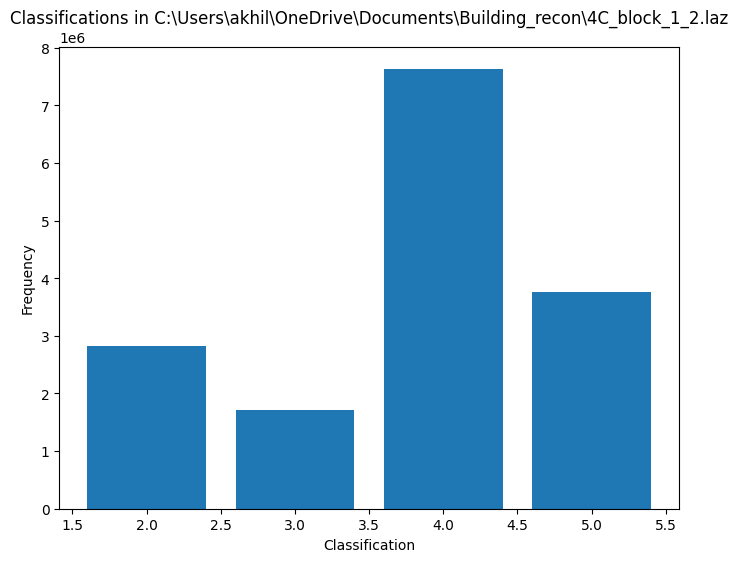

Unique Classifications in C:\Users\akhil\OneDrive\Documents\Building_recon\4C_block_1_2.laz:
Class 2: 2820358 points
Class 3: 1709085 points
Class 4: 7635965 points
Class 5: 3764287 points


In [2]:
import laspy
import numpy as np
import matplotlib.pyplot as plt

# Load the .laz file
file_path = r'C:\Users\akhil\OneDrive\Documents\Building_recon\4C_block_1_2.laz'  # Update this with your actual file path
las_data = laspy.read(file_path)

# Get the classification data
classification = las_data.classification

# Get unique classification values
unique_classes = np.unique(classification)

# Plot the unique classification values
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, np.bincount(classification)[unique_classes])
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.title(f'Classifications in {file_path}')
plt.show()

# Print the unique classifications and their frequencies
print(f"Unique Classifications in {file_path}:")
for cls in unique_classes:
    print(f"Class {cls}: {np.sum(classification == cls)} points")


In [3]:
# Extract points and classification data
points = np.vstack((las.x, las.y, las.z)).transpose()
classification = las.classification
print (classification)

<SubFieldView([5 5 5 ... 2 2 2])>


In [6]:
# Filter points classified as buildings (class 8)
building_indices = np.where(classification == 5)[0]
building_points = points[building_indices]
print(f"Total points: {points.shape[0]}")
print(f"Building points: {building_points.shape[0]}")

Total points: 15929695
Building points: 3764287


In [7]:
# Create an Open3D point cloud from the filtered building points
building_pcd = o3d.geometry.PointCloud()
building_pcd.points = o3d.utility.Vector3dVector(building_points)

# Optionally, if you have RGB values for the building points, add them
# Uncomment the lines below if you have RGB values
# building_colors = np.array([...])  # Replace with your RGB values corresponding to building_points
# building_pcd.colors = o3d.utility.Vector3dVector(building_colors / 255.0)  # Normalize if RGB values are 0-255

# Visualize the filtered building point cloud
o3d.visualization.draw_geometries([building_pcd], window_name="Filtered Building Points", width=800, height=600)

In [29]:
# Perform DBSCAN clustering on the filtered building points
with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(building_pcd.cluster_dbscan(eps=1.6, min_points=30, print_progress=True))

# Number of clusters, ignoring noise (label -1)
max_label = labels.max()
print(f"Building point cloud has {max_label + 1} clusters")

[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 2678
Building point cloud has 2678 clusters


In [30]:
# Save the clustered point cloud
o3d.io.write_point_cloud("clustered_lidar_point_cloud.ply", building_pcd)


True

In [31]:
# Extract clusters and visualize (optional)
import matplotlib.pyplot as plt
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
building_pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])

In [32]:
# Visualize the result
o3d.visualization.draw_geometries([building_pcd], window_name='DBSCAN Clustering of LiDAR Point Cloud')

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 


In [33]:
import numpy as np
import os
import random
import open3d as o3d

# Assuming clustering is already done and `labels` is available
max_label = labels.max()
print(f"Building point cloud has {max_label + 1} clusters")

# Create a folder to save the clusters
output_folder = "clusters"
os.makedirs(output_folder, exist_ok=True)

# Save each cluster to a file
for i in range(max_label + 1):
    cluster_points = building_pcd.select_by_index(np.where(labels == i)[0])
    cluster_file = os.path.join(output_folder, f"cluster_{i}.ply")
    o3d.io.write_point_cloud(cluster_file, cluster_points)

print(f"Saved {max_label + 1} clusters to the folder: {output_folder}")

# Visualize 5 random clusters in separate windows
sampled_clusters = random.sample(range(max_label + 1), min(50, max_label + 1))

for cluster_idx in sampled_clusters:
    cluster_points = building_pcd.select_by_index(np.where(labels == cluster_idx)[0])
    cluster_points.paint_uniform_color(np.random.rand(3))  # Random color for better visualization
    print(f"Displaying cluster {cluster_idx}")
    o3d.visualization.draw_geometries([cluster_points], window_name=f"Cluster {cluster_idx}")


Building point cloud has 2678 clusters
Saved 2678 clusters to the folder: clusters
Displaying cluster 458
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
Displaying cluster 2282
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
Displaying cluster 1260
Displaying cluster 624
[Open3D WARNING] GLFW Error: WGL: Failed to make context 